In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', '87b7a1b0a1c14203b42afa71fd31aa82')

In [3]:
bird_types = 'penguin','parrot','hummingbird'
path = Path('birds')

In [4]:
# if not path.exists():
#     path.mkdir()
#     for o in bird_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o}')
#         download_images(dest, urls=results.attrgot('content_url'))

In [5]:
fns = get_image_files(path)

In [6]:
failed = verify_images(fns)

In [8]:
failed

(#2) [Path('birds/hummingbird/00000083.jpg'),Path('birds/parrot/00000076.jpg')]

In [7]:
failed.map(Path.unlink);

In [31]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [32]:
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = birds.dataloaders(path)

In [33]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.597913,0.100887,0.022727,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.216448,0.022845,0.000000,00:15
1,0.146985,0.005502,0.000000,00:15
2,0.111348,0.003356,0.000000,00:16
3,0.087715,0.004470,0.000000,00:15


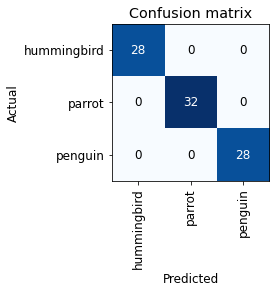

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

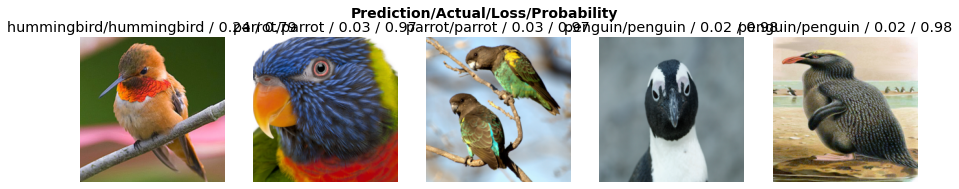

In [35]:
interp.plot_top_losses(5, nrows=1)

In [36]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
# # hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [37]:
learn.export()

In [18]:
learn.predict('hummingbird.jpg')

('hummingbird', tensor(0), tensor([1.0000e+00, 5.6193e-08, 2.6397e-08]))

In [19]:
learn.predict('parrot.jpg')

('parrot', tensor(1), tensor([1.7829e-05, 9.9995e-01, 3.5058e-05]))

In [23]:
learn.predict('penguin.jpg')

('penguin', tensor(2), tensor([7.7383e-06, 8.6091e-05, 9.9991e-01]))